In [15]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np


In [2]:
df=pd.read_csv('https://cocl.us/datascience_survey_data')

In [3]:
df.head()

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [4]:
df.shape

(6, 4)

In [5]:
dt=df.sort_values(by=['Very interested'],ascending=False)

In [6]:
dt

,Unnamed: 0,Very interested,Somewhat interested,Not interested
1,Data Analysis / Statistics,1688,444,60
5,Machine Learning,1629,477,74
3,Data Visualization,1340,734,102
0,Big Data (Spark / Hadoop),1332,729,127
4,Deep Learning,1263,770,136
2,Data Journalism,429,1081,610


In [7]:
cols=['Very interested','Somewhat interested','Not interested']

In [8]:
dg = dt.sum(axis=1)

In [9]:
for n in range(0,3):
    dt[cols[n]]=dt[cols[n]]/dg

In [10]:
dt.round(2)

,Unnamed: 0,Very interested,Somewhat interested,Not interested
1,Data Analysis / Statistics,0.77,0.20,0.03
5,Machine Learning,0.75,0.22,0.03
3,Data Visualization,0.62,0.34,0.05
0,Big Data (Spark / Hadoop),0.61,0.33,0.06
4,Deep Learning,0.58,0.36,0.06
2,Data Journalism,0.20,0.51,0.29


In [11]:
dt.set_index("Unnamed: 0",drop=True,inplace=True)

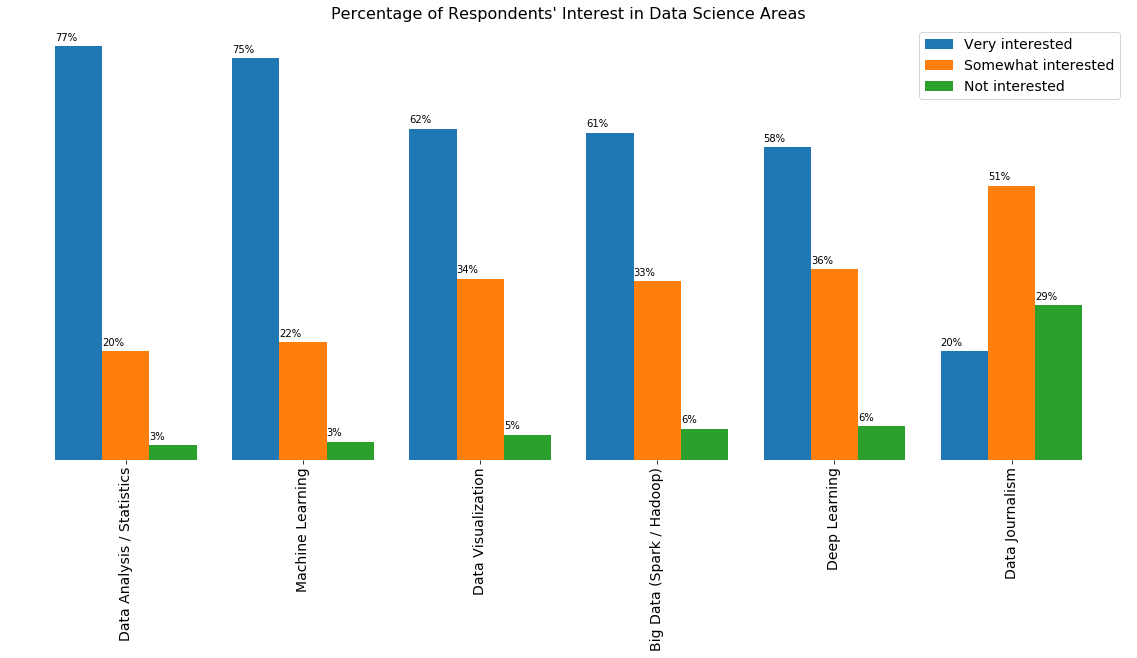

In [25]:
dt.plot(kind='bar',figsize=(20, 8),width=0.8)
ax = plt.subplot(111)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')

plt.xlabel("")
plt.title(' percentage of the respondents\' interest in the different data science topics surveyed')
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
plt.legend(labels=dt.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
plt.show()
